<a href="https://colab.research.google.com/github/fujitako03/machine-learning-tutorials/blob/main/waifu_diffusion_v1_4_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# waifu-diffusion-v1-4を試してみる
- [モデル（hagging face）](https://huggingface.co/hakurei/waifu-diffusion-v1-4/)
- [リリース（GitHub）](https://gist.github.com/harubaru/8581e780a1cf61352a739f2ec2eef09b)


## waifu-diffusion-v1-4とは

Waifu Diffusion 1.4モデルは、Stable Diffusion v2.1 Baseをベースに微調整を行ったモデルです。

Waifu Diffusion 1.4 のファインチューニングに使用したデータは、サイトにアップロードされた作品自体に高品質のタグ付けとオリジナルソースを提供する画像掲示板を通じてダウンロードされた546万8025点のテキスト画像サンプルです。

In [1]:
# GPUのタイプを確認
!nvidia-smi

Thu Jan  5 15:07:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## インストール

In [2]:
!pip install --upgrade diffusers[torch] transformers accelerate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## パイプラインを作成

In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
 
model_id = "hakurei/waifu-diffusion"
 
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

## 生成
プロンプトはAI画像生成コンテストの[こちらの画像](https://ai-image-posting-service.com/artworks/1668671947660x618831533318340600)を参考にした。ネガティブプロンプトは[公式推奨](https://gist.github.com/harubaru/8581e780a1cf61352a739f2ec2eef09b)そのまま。

粗目ではあるが、けっこうかわいい

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['shiny skin, detailed skin, detailed hair, detailed girl, flat chest, holding paper, holding sign with smile face, thank you,']


  0%|          | 0/25 [00:00<?, ?it/s]

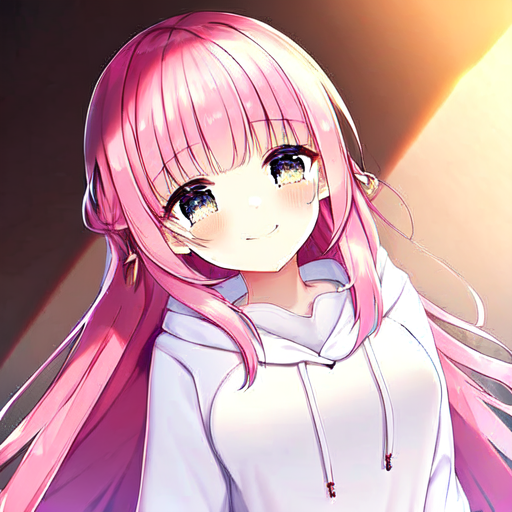

In [4]:
prompt = "masterpiece, best quality, high quality, absurdres, happy,smile,tears,solo,  cute,kawaii,best quality, high quality, highly detailed, game cg, teenage, Amazing, finely detail, Depth of field, extremely detailed CG, original, extremely detailed wallpaper,1girl,loli, pink hair, long hair,white hoodie,beautiful detailed girl, shiny skin,detailed skin,detailed hair, detailed girl, flat chest, holding paper, holding sign with smile face , thank you, "

negative_prompt = "worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"
 
image = pipe(
    prompt,
    num_inference_steps=25,
    guidance_scale=7.5,
    negative_prompt=negative_prompt
).images[0]
 
out_path = "output2.png"
image.save(out_path)

# 表示
from IPython.display import Image,display
display(Image(out_path))

公式が推奨している、先頭に入れると美しくなる呪文`masterpiece, best quality, high quality, absurdres`を入れない場合

こういうのもなくはないが、明らかに質が落ちた

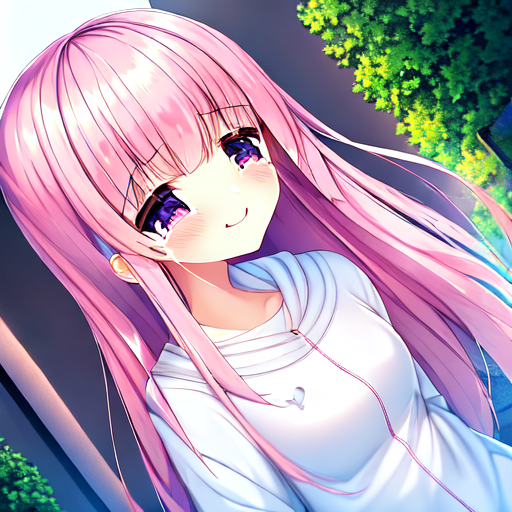

In [5]:
display(Image("output.png"))